# GTIF Convert a vector (shape file) into a raster (Geotiff)

In [1]:
import geopandas as gpd
import gdal
import fiona

## Reading shapefile using geopandas

In [2]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#shapefile = gpd.read_file(r'C:\CFL_41.shp')
shapefile = gpd.read_file(r"C:\Archive(2)\CS41.shp")
#shapefile = shapefile.drop(columns=['KG', 'NS_RECHT'])
shapefile

,NS,geometry
0,41,"POLYGON ((624742.810 486260.869, 624794.403 48..."
1,41,"POLYGON ((624742.810 486260.869, 624794.786 48..."
2,41,"POLYGON ((624803.268 486260.081, 624806.165 48..."
3,41,"POLYGON ((624846.282 486258.252, 624854.264 48..."
4,41,"POLYGON ((624568.752 486226.651, 624559.791 48..."
...,...,...
4385829,41,"POLYGON ((124557.078 380598.786, 124563.794 38..."
4385830,41,"POLYGON ((124611.025 380587.817, 124609.484 38..."
4385831,41,"POLYGON ((124566.373 380589.646, 124564.398 38..."
4385832,41,"POLYGON ((124552.031 380525.477, 124547.748 38..."


In [4]:
shapefile.columns

Index(['NS', 'geometry'], dtype='object')

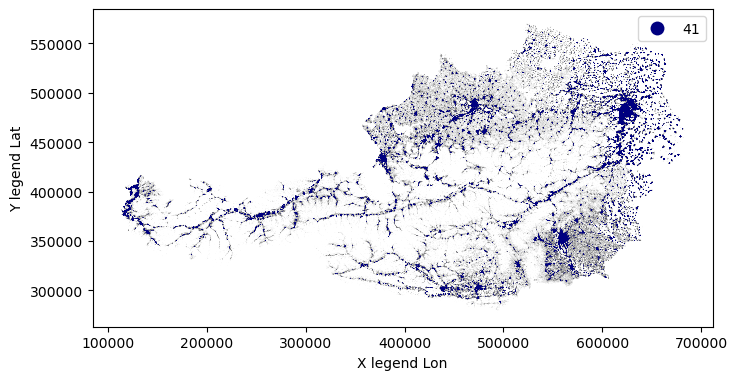

In [5]:
fig, ax = plt.subplots(1, figsize = (8,12))
shapefile.plot(ax=ax, column = 'NS', cmap = 'jet', legend = True)
plt.xlabel('X legend Lon')
plt.ylabel('Y legend Lat')
plt.show()


In [6]:
shapefile.crs

<Projected CRS: EPSG:31287>
Name: MGI / Austria Lambert
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Austria
- bounds: (9.53, 46.4, 17.17, 49.02)
Coordinate Operation:
- name: Austria Lambert
- method: Lambert Conic Conformal (2SP)
Datum: Militar-Geographische Institut
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

## Reading shapefile and converting shapefile into raster by using gdal

In [18]:
from osgeo import gdal, ogr, osr
import fiona

In [2]:
#input_shp = ogr.Open(r'C:\CFL_41.shp')
input_shp = ogr.Open(r"C:\Archive(2)\CS41.shp")
#get all the layers
source_layer = input_shp.GetLayer()
# look at all columns/attributes
defn = source_layer.GetLayerDefn()
column_names = []
for n in range(defn.GetFieldCount()):
    fdefn = defn.GetFieldDefn(n)
    column_names.append(fdefn.name)

In [125]:
#column_names

In [7]:
#specify location
#output_raster_location = r'C:\raster_created.tif'
output_raster_location = r'C://Users//Sara Aparício//Dropbox//Python//raster10_2.tif'
# depends on projection 4327..
pixel_size = 10 # initially was 0.1

In [8]:
#from shapefile get boundaries
xmin, xmax, ymin, ymax = source_layer.GetExtent()
x_res = int(round(xmax-xmin)/pixel_size)
y_res = int(round(ymax-ymin)/pixel_size)

#creates memory target raster
target_ds = gdal.GetDriverByName('GTiff').Create(output_raster_location,x_res,y_res,1,gdal.GDT_Int32,['COMPRESS=LZW'])
#Specifies the spatial reference of the raster datase
#Where each element represents a parameter that defines the position and size of pixels in the dataset
target_ds.SetGeoTransform((xmin, pixel_size,0.0,ymax,0.0, -pixel_size))

#Creates a spatial reference object
srse = osr.SpatialReference()
proj = 'EPSG:31287'# correct it 'EPSG:31287' # before it was 'EPSG:31255' and it worked....file rasterV was the result
srse.SetWellKnownGeogCS(proj)
#Sets the projection to the input dataset
target_ds.SetProjection(srse.ExportToWkt())
band = target_ds.GetRasterBand(1)
target_ds.GetRasterBand(1)#.SetNoDataValues(-9999)
#band.Fill(-9999)

## APPLYING THE GDAL.RASTERIZE
## TRIAL 1 - raster 2
gdal.RasterizeLayer(target_ds,[1], source_layer,None, None, [1], options = ['ALL_TOUCHED=TRUE', 'ATTRIBUTE=NS'])

## APPLYING THE GDAL.RASTERIZE
## TRIAL 1.1
#gdal.RasterizeLayer(target_ds,[1], source_layer, burn_values=[41])


# TRIAL 1.2 - raster 4
#gdal.RasterizeLayer(target_ds, [1], source_layer, burn_values=[1]) #raster4

target_ds = None



# burnValues=0

## Open Raster using xarray

In [9]:
#import xarray as xr
#output_raster_location = r'C://Users//Sara Aparício//Dropbox//Python//raster10_2.tif'
#raster = xr.open_rasterio(output_raster_location).squeeze()

In [20]:
#import rasterio
#from matplotlib import pyplot
#src = rasterio.open(output_raster_location)
#src.read(1)
#pyplot.imshow(src.read(1).reshape( 2921040, 5702100), cmap='pink')

#pyplot.show()

In [ ]:
#raster.shape

In [ ]:
#raster

### Visualizing raster 

In [21]:
#import rasterio
#from rasterio.plot import show
#fp = r'C://Users//Sara Aparício//Dropbox//Python//raster10_2.tif'
#img = rasterio.open(fp)
#show(img)
#img.crs

In [112]:
print(img.bounds)

BoundingBox(left=112855.38889568206, bottom=277882.8105668593, right=683055.3888956821, top=569982.8105668593)


## Reprojecting and saving as COG 💃

In [12]:
# UPDATE HERE THE LOCATION OF THE RASTER !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
output_raster_location = r'C://Users//Sara Aparício//Dropbox//Python//raster10_2.tif'

In [13]:
#Settings for the conversion to TIFF
projection = '-a_srs EPSG:3857'#'-a_srs EPSG:31287 ' #### #before it was '-a_srs EPSG:31255 ' 
output_format = ' -of GTiff'
#Settings for the conversion to COG
compression =  ' -co COMPRESS=LZW'
output_format2 = ' -of COG'



# Define path name where raster is
old_name = output_raster_location
# Name of the varialbe to be extracted
#var_name = 'ffp_values'
# Writes the netcdf with selected varialbe in the format to be used/read for the gdal translate
sublayername =  gdal.Open(old_name,gdal.GA_ReadOnly)


In [14]:
#Creates the output name w
outname = r'C://Users//Sara Aparício//Dropbox//Python//' + 'Intermediate10_2.tif'
#print('\n Verifying if outputname is correct. The output name is: ',outname)
band = ' -b 1'
                                                                        #str(11.379291) + ' ' + str(47.268726) + ' ' + str(11.392094) + ' ' + str(47.259460) 
#translateOptionText = projection + output_format + band +' -a_ullr '  + str(9.53) + ' ' + str(46.4) + ' ' + str(17.17) + ' ' + str(49.02)
translateOptionText = projection + output_format + band #+' -a_ullr '  + str(112855.38889568206) + ' ' + str(683055.3888956821) + ' ' + str(277882.8105668593) + ' ' + str(569982.8105668593)
#print('\n Verifying if the command is correct. The command is: ', translateOptionText) 
translateOptions = gdal.TranslateOptions(gdal.ParseCommandLine(translateOptionText))
gdal.Translate(outname,sublayername,options = translateOptions)
#9.53, 46.4, 17.17, 49.02


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001C93A7ACD80> >

In [15]:
# REPROJECTING TO ESPG: 3857 ############################################################################################
old_name[0:43]
inname =  old_name[0:43] + 'Intermediate10_2.tif'
outname = old_name[0:43] + 'Reprojected10_2.tif'
print("Confirming Output file name is:", outname)
print("Confirming Input file name is :", inname)
ds = gdal.Warp(outname, inname, dstSRS='EPSG:3857')
del ds
    
# CONVERTST REPROJECTED TIF TO COG ######################################################################################
inname2 =  old_name[0:43] + 'Reprojected10_2.tif'
outname2 = old_name[0:43] + 'Final10_2.tif'
print("Confirming Output file name is:", outname)
print("Confirming Input file name is :", inname)
ds = gdal.Translate(outname2, inname2, options=" -of COG -co COMPRESS=LZW")
del ds
print("ALL DONE!")

Confirming Output file name is: C://Users//Sara Aparício//Dropbox//Python//Reprojected10_2.tif
Confirming Input file name is : C://Users//Sara Aparício//Dropbox//Python//Intermediate10_2.tif
Confirming Output file name is: C://Users//Sara Aparício//Dropbox//Python//Reprojected10_2.tif
Confirming Input file name is : C://Users//Sara Aparício//Dropbox//Python//Intermediate10_2.tif
ALL DONE!


In [25]:
dataset = rasterio.open(r'C://Users//Sara Aparício//Dropbox//Python//Final10_2.tif') 
# No. of Bands and Image resolution
print(dataset.count)
print(dataset.height) 
print(dataset.width)
# Coordinate Reference System
print(dataset.crs)

1
29210
57021
EPSG:3857


In [22]:
#import rasterio
#from rasterio.plot import show
#fp = r'C://Users//Sara Aparício//Dropbox//Python//Final10_2.tif'
#img = rasterio.open(fp)
#show(img)

1


<Figure size 1200x2000 with 0 Axes>

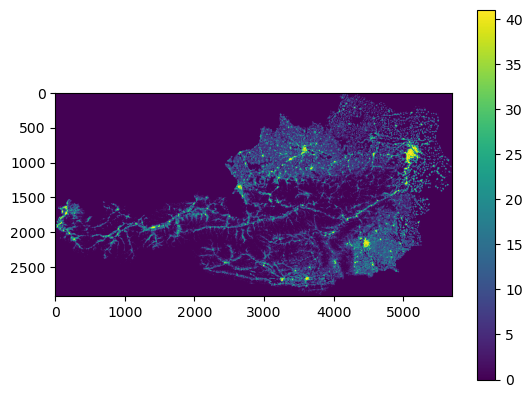

In [137]:
# Some bands have no info for exampple: 21, 9, 23, 24, 38, 42
import matplotlib.pyplot as plt

# CHANGE HERE THE VALUE BETWEEN 1 TO 48 TO VISUALIZAE THE DIFFERENT BANDS
i = 1
#path to the file
#fn = old_name[0:43] + 'Final11.tif'
#print(fn)
ds = gdal.Open(r'C://Users//Sara Aparício//Dropbox//Python//Final10_2.tif')
print(ds.RasterCount)
# Read raster data
data_array = ds.GetRasterBand(1).ReadAsArray()
#data_array.shape
plt.figure(figsize=(12, 20))
plt.figure()
plt.imshow(data_array)
plt.colorbar()
plt.show()

## Ends here 💃💃💃💃